# Linear regression

**[Faisal Z. Qureshi](http://vclab.science.uoit.ca)**  

Fitting $y = mx + c$ to data

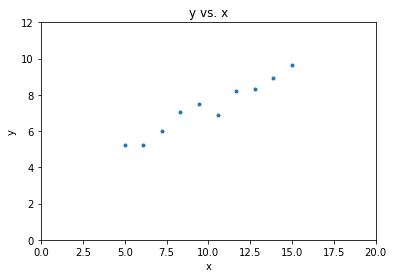

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def data_generate(N=10, mu=0, sigma=.4, xstart=0, xend=1):
    x = np.linspace(xstart,xend,N)
    m, c = .5, 2    
    y = m * x + c + np.random.normal(mu, sigma, N)
    return x,y

def data_plot(x, y):
    plt.figure(1)
    plt.title('y vs. x')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axis([0,20,0,12])
    plt.plot(x,y,'.')
    plt.show()
    
np.random.seed(0)
x, y = data_generate(xstart=5, xend=15)
data_plot(x, y)

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [3]:
class LinearRegressionModel(nn.Module):
    
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out

In [8]:
input_dim = 1
output_dim = 1 

model = LinearRegressionModel(input_dim, output_dim)
criterion = nn.MSELoss(reduction='elementwise_mean')
l_rate = 0.1
optimiser = torch.optim.Adam(model.parameters(), lr=l_rate)

In [9]:
print_values = False
epochs = 100
for epoch in range(epochs):
    epoch += 1
    
    inputs = Variable(torch.FloatTensor(x).unsqueeze_(1))
    labels = Variable(torch.FloatTensor(y).unsqueeze_(1))
        
    optimiser.zero_grad()
    
    outputs = model(inputs)
    
    if epoch % 10 == 0 and print_values == True:
        print('Inputs')
        print(inputs)
        print('Labels')
        print(labels)
        print('Outputs')
        print(outputs)
    
    loss = criterion(outputs, labels)
    loss.backward()
    optimiser.step()
    
    if epoch % 10 == 0:
        print('epoch {}, loss {}'.format(epoch,loss.data.item()))

epoch 10, loss 4.825193405151367
epoch 20, loss 1.7441149950027466
epoch 30, loss 0.8075619339942932
epoch 40, loss 0.5681356191635132
epoch 50, loss 0.4789844751358032
epoch 60, loss 0.41825976967811584
epoch 70, loss 0.36589691042900085
epoch 80, loss 0.3191046714782715
epoch 90, loss 0.2782481908798218
epoch 100, loss 0.2438182532787323


In [10]:
slope = model.linear.weight.data.numpy()[0][0]
bias = model.linear.bias.data.numpy()[0]

print(slope)
print(bias)

0.5462091
1.7255366


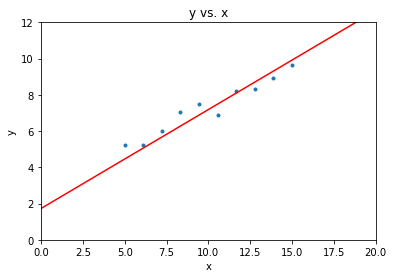

In [11]:
def make_line(model=model, xstart=0, xend=1):
    x = np.linspace(xstart, xend, 10)
    x = torch.Tensor(x).unsqueeze_(1)
    #print(x)
    model.eval()
    y = model(Variable(x))
    return x.squeeze_().numpy(), y.squeeze_().data.numpy()

x_line, y_line = make_line(model, 0, 20)

#print(x_line) # Torch tensor
#print(y_line) # Variable (torch tensor)

#print (x_line.squeeze_().numpy())
#print (y_line.squeeze_().data.numpy())


def make_line(slope, bias, xstart=0, xend=1):
    x = np.linspace(xstart,xend,10)
    m, c = slope, bias    
    y = m * x + c
    return x, y

def data_plot_w_line(x, y, x_line, y_line):
    plt.figure(1)
    plt.title('y vs. x')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axis([0,20,0,12])
    plt.plot(x,y,'.')
    plt.plot(x_line, y_line, 'r-')
    plt.show()
    
#x_line, y_line = make_line(xstart=0, xend=20, slope=slope, bias=bias)
data_plot_w_line(x, y, x_line, y_line)
